In [19]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import levene
from scipy.stats import shapiro


In [2]:
X = [21, 24, 32, 47, 50, 59, 68, 74, 62, 50, 41, 30]
Y = [185.79, 214.47, 288.03, 424.84, 454.58, 539.03, 621.55, 675.06, 562.03, 452.93, 369.95, 273.98]

## a)
Usando um diagrama de dispersão, verifique se existe uma relação linear entre as duas variáveis.

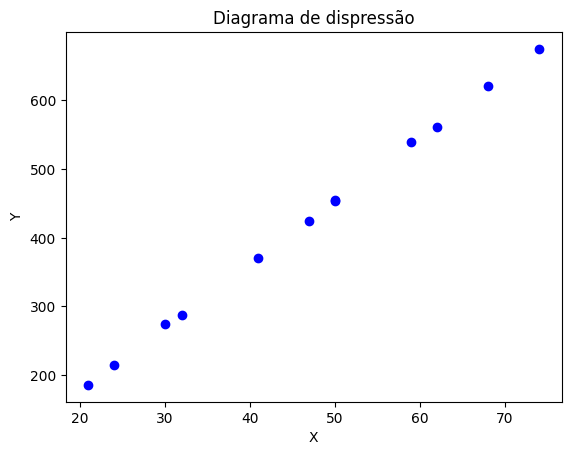

In [3]:
plt.scatter(X, Y, color='blue')
plt.title('Diagrama de dispressão')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Comentário:
Existe uma relação linear entre as duas variáveis, existe uma reta que se "ajusta" aos pontos do
conjunto de dados.

## b)
Estime os parâmetros da recta de regressão e y(40

In [6]:
Xc = sm.add_constant(X)
modelo = sm.OLS(Y, Xc)
res = modelo.fit()
parametros = res.params
print(parametros)

[-6.33550166  9.20836204]


Os valores estimados dos parâmetros da recta de regressão
Y = $\beta_0$ + $\beta_1$X
são
$\beta_0$ = -6,3
$\beta_1$X = 9,2 

A estimativa de y(40) é dada por $\beta_0$ + $\beta_1$ x 40 

In [7]:
y40 = parametros[0] + parametros[1] * 40
print('estimativa de y(40):', y40)

estimativa de y(40): 361.99898005439695


O cálculo também pode ser realizado com:

In [8]:
y40p = res.predict([1, 40])
print(y40p)

[361.99898005]


## c)
Calcule o coeficiente de correlação linear de Pearson e comente os resultados.

In [11]:
R, p_value = pearsonr(
    X, Y, alternative='greater')
print('R:', R)
print('Coeficiente de determinação:', R ** 2)
# alternativamente
print('R**2 :', res.rsquared)

R: 0.9999327431367925
Coeficiente de determinação: 0.9998654907970707
R**2 : 0.9998654907970707


comentário:
Ou seja, a variável X explica cerca de 99% da variabilidade da variável resposta y.

## d)
Determine se os pressupostos relativos aos resíduos se verificam.

Deve-se verificar:
* Homocedasticidade; Em cada nível da variável preditora, a variância dos respectivos resíduos deve ser igual.
* Normalidade dos resíduos; Os resíduos devem seguir uma distribuição normal com média
zero.
* Independência dos resíduos; Para cada par de observações os resíduos não devem estar
correlacionados.

(i) Homocedasticidade:
Traçar o gráfico dos resíduos vs valores ajustados (ou resíduos vs valores da variável
explicativa).

In [12]:
residuos = res.resid
val_ajust = res.fittedvalues

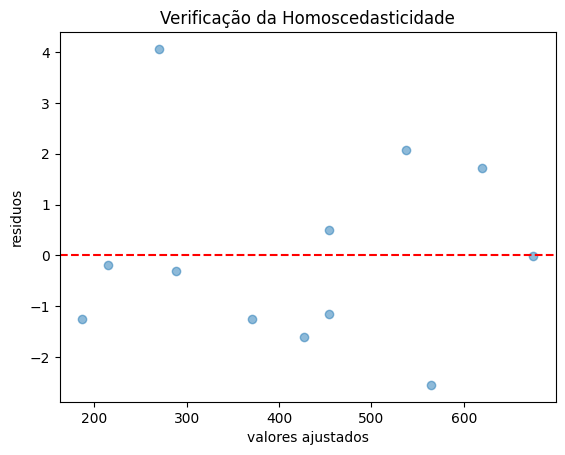

In [13]:
plt.scatter(val_ajust, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Verificação da Homoscedasticidade')
plt.xlabel('valores ajustados')
plt.ylabel('residuos')
plt.show()

### comentários
* Para o diagnóstico de heteroscedasticidade, tentamos encontrar alguma tendência no gráfico.
Por isso, se os pontos estão aleatoriamente distribuídos em torno do 0, sem nenhum
comportamento ou tendência, temos indícios de que a variância dos resíduos é
homoscedástica.
* Como amostra é pequena o diagnóstico não é conclusivo. Devemos complementar o
diagnóstico fazendo um teste à variância. Para o efeitos dividimos os dados por exemplo em
dois conjuntos, utilizando a mediana.

In [15]:
med = np.median(residuos)
infres = residuos[residuos < med]
supres = residuos[residuos > med]
type(infres)
stat, pval = levene(infres, supres)
print(pval)

0.08410744476267959


O p-value é logo, não se rejeita a hipótese nula.
Embora este teste não permita assegurar que a homocedasticidade se verifica podemos usá-lo
como suporte ao gráfico e assumimos que se verifica a propriedade da homocedacidade.

(ii) Normalidade dos resíduos:
QQ-normal-plot

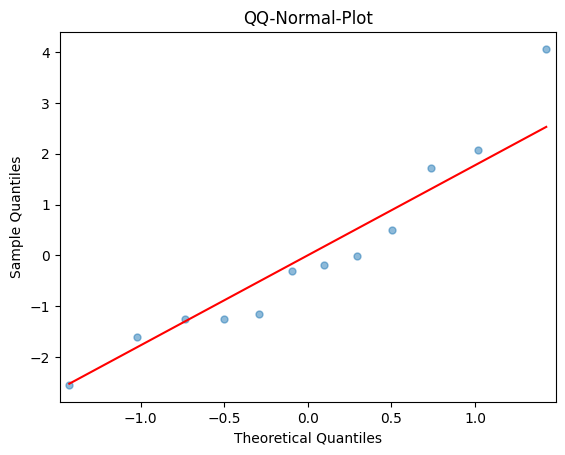

In [16]:
sm.qqplot(residuos, line='s', markersize=5, alpha=0.5)
plt.title('QQ-Normal-Plot')
plt.show()


Teste de Shapiro;

In [18]:
stat, pvalue = shapiro(residuos)
print(pvalue)

0.40656956725496585


### comentário
Considera-se que os resíduos são normais.

(iii) Independência dos resíduos:
teste de Durbin Watson

In [20]:
durbinWatson = durbin_watson(residuos)
print('valor da estatística DW:', durbinWatson)

valor da estatística DW: 1.3155349067814377


### Comentário
Considera-se que os resíduos são independentes se o valor da estatística teste
satisfizer a relação;
Caso contrário considera-se que não são independentes.
Consequentemente considera-se que a condição não se verifica.

### Conclusão
Apenas se verifica a condição de normalidade. Consequentemente as estimativas do modelo de
regressão podem não ser válidas.